In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('data_gradientDescent_1feature.csv')
r=[float(i) for i in data.columns]
data.loc[99]=r
data.columns=['x','y']
data

,x,y
0,53.426804,68.777596
1,61.530358,62.562382
2,47.475640,71.546632
3,59.813208,87.230925
4,55.142188,78.211518
...,...,...
95,49.239765,72.111832
96,50.039576,85.232007
97,48.149859,66.224958
98,25.128485,53.454394


In [3]:
def get_data():
    data=pd.read_csv('data_gradientDescent_1feature.csv')
    r=[float(i) for i in data.columns]
    data.loc[99]=r
    data.columns=['x','y']
    data
    return data

In [4]:
def gd_step(data,learning_rate,m,c):
    r=data.y-m*(data.x)-c
    dcost_by_dm=(-2/data.shape[0])*((r*data.x).sum())
    dcost_by_dc=(-2/data.shape[0])*(r.sum())
    m_new=m-learning_rate*dcost_by_dm
    c_new=c-learning_rate*dcost_by_dc
    return m_new,c_new

In [5]:
def cost(data,m,c):
    c=((data.y-(m*data.x+c))**2).sum()
    print(c)

In [11]:
def gd(data,iterate,learning_rate):
    m=0
    c=0
    for i in range(iterate):
        m,c= gd_step(data,learning_rate,m,c)
#         cost(data,m,c)
    return m,c

In [12]:
def run():
    iterate=100
    learning_rate=0.0001
    data=get_data()
    m,c=gd(data,iterate,learning_rate)
    return m,c

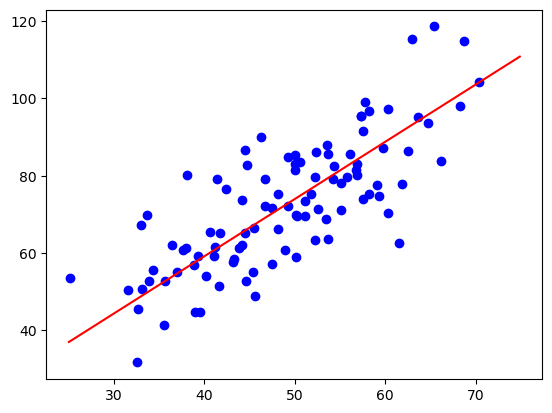

In [35]:
m,c=run()
import matplotlib.pyplot as plt
g=[float(i) for i in data.x]
h=[float(i) for i in data.y]
plt.scatter(g,h, color='blue')
X=np.arange(25,75,0.1)
Y=m*X+c
plt.plot(X,Y,'r')
plt.show()

In [58]:
# comparing with linear regression model
from sklearn import model_selection
xx=data.x
yy=data.y
x_train,x_test,y_train,y_test=model_selection.train_test_split(xx,yy)

In [78]:
from sklearn.linear_model import LinearRegression
model_LR=LinearRegression()
ty=x_train.values.reshape(-1, 1)
model_LR.fit(ty,y_train)

LinearRegression()

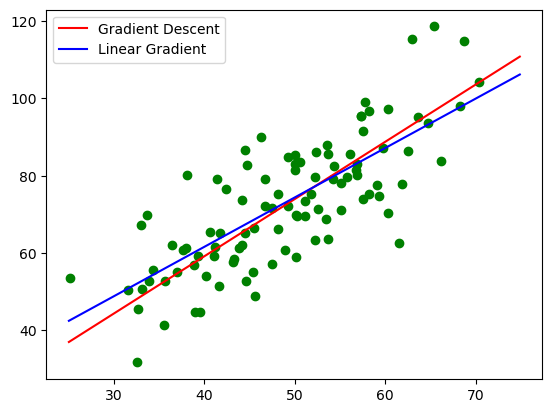

In [79]:
plt.scatter(data.x,data.y, color="green")
X=np.arange(25,75,0.1)
Y=m*X+c
y2=model_LR.predict(X.reshape(-1, 1))
plt.plot(X,Y,'r',label='Gradient Descent')
plt.plot(X,y2,'b', label='Linear Gradient')
plt.legend()
plt.show()